In [102]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from scipy import stats



from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.api import Holt

In [34]:
def get_airbnb_data():
    df = df = pd.read_csv('Listings.csv',encoding='ISO-8859-1')
    return df

In [35]:
df=get_airbnb_data()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [37]:
df = df.drop(['name',
              'host_id',
              'host_since',
              'host_location',
              'host_response_time',
              'host_response_rate',
              'host_acceptance_rate',
              'host_is_superhost',
              'host_total_listings_count',
              'host_has_profile_pic',
              'host_identity_verified',
              'neighbourhood',
              'latitude',
              'longitude',
              'property_type',
              'room_type',
              'accommodates',
              'district',
              'minimum_nights',
              'maximum_nights',
              'review_scores_rating',
              'review_scores_accuracy',
              'review_scores_cleanliness',
              'review_scores_checkin',
              'review_scores_communication',
              'review_scores_location',
              'review_scores_value',
              'instant_bookable' 
               ], axis=1)

df=df.dropna()
dummies = df["amenities"].str.get_dummies(",")
dummies['total_amenities'] = dummies.sum(axis=1, numeric_only= True)
dummies=dummies.total_amenities
df = df.join(dummies)
df = df.drop(['amenities'], axis=1)

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 250277 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   listing_id       250277 non-null  int64  
 1   city             250277 non-null  object 
 2   bedrooms         250277 non-null  float64
 3   price            250277 non-null  int64  
 4   total_amenities  250277 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.5+ MB


In [23]:
def target_dist(df):
    '''
    Creates a hist plot to show the distribution of tax_value for properties by county
    Accepts a dataframe and creates/displays a plot
    '''
    # Plot Distribution of target variable
    plt.figure(figsize=(24,12))
    sns.set(font_scale=2)
    plt.title('Distribution of Tax Values')
    sns.histplot(data=df, x='bedrooms', hue='price', bins= 75)
    #plt.legend(labels=["Los Angeles","Orange","Ventura"])


In [40]:
df = df[df['bedrooms'] < 6]


In [42]:
df.bedrooms.max()

5.0

In [43]:
df = df[df['price'] < 1001]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216485 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   listing_id       216485 non-null  int64  
 1   city             216485 non-null  object 
 2   bedrooms         216485 non-null  float64
 3   price            216485 non-null  int64  
 4   total_amenities  216485 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.9+ MB


In [46]:
df.price.describe()

count    216485.000000
mean        226.807691
std         225.347430
min           1.000000
25%          72.000000
50%         130.000000
75%         300.000000
max         999.000000
Name: price, dtype: float64

In [47]:
def split_data(df):
    '''
    Takes in a dataframe and target (as a string). Returns train, validate, and test subset 
    dataframes with the .2/.8 and .25/.75 splits to create a final .2/.2/.6 split between datasets
    '''
    # split the data into train and test. 
    train, test = train_test_split(df, test_size = .2, random_state=123)
    
    # split the train data into train and validate
    train, validate = train_test_split(train, test_size = .25, random_state=123)
    
    return train, validate, test



In [48]:
train, validate, test=split_data(df)

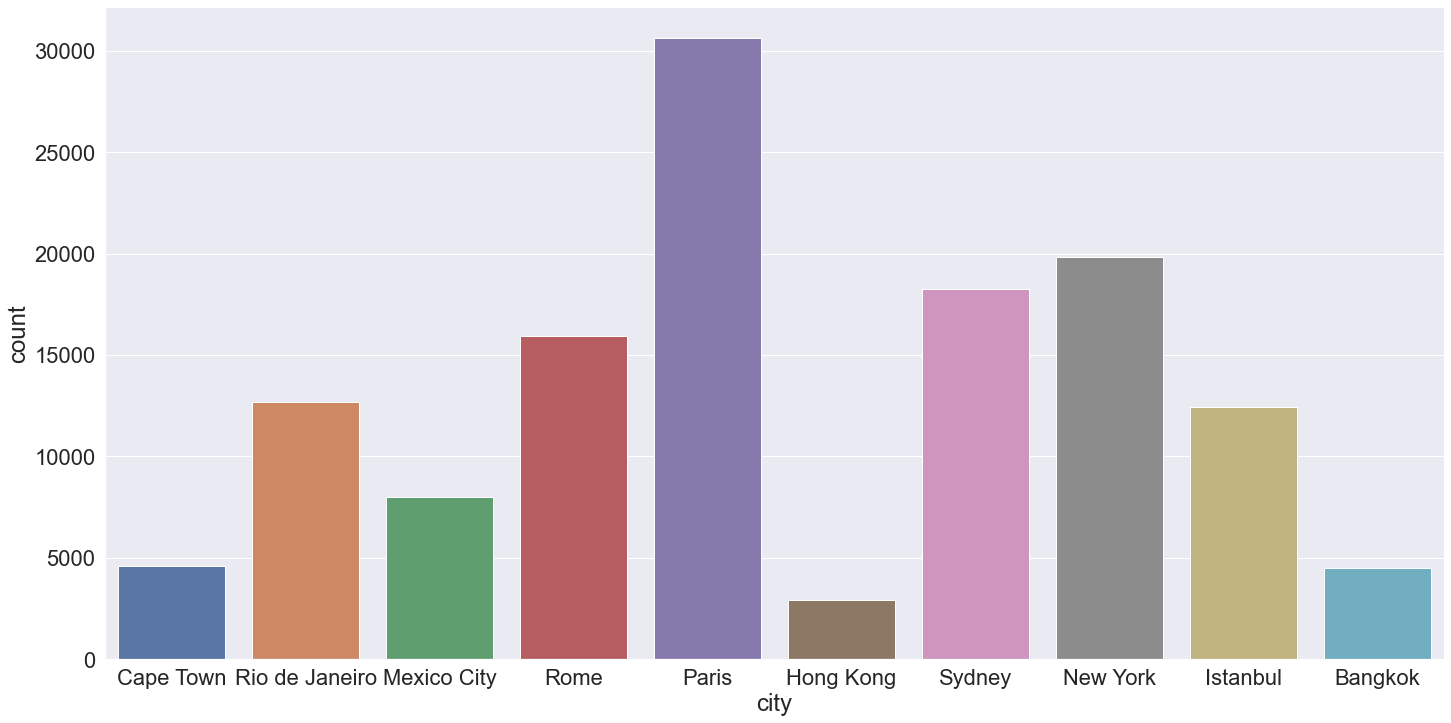

In [128]:
num_vars = ['bedrooms', 'price', 'total_amenities']
cat_vars = ['city']

for col in cat_vars:
    
   
    plt.figure(figsize=(24,12))
    sns.set(font_scale=2)
    sns.countplot(x=col, data=train)
   
    plt.show()

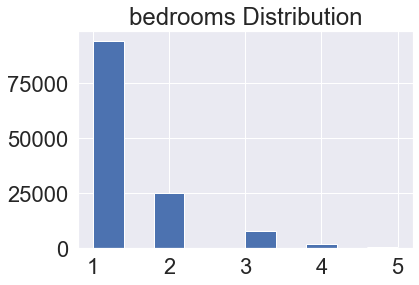

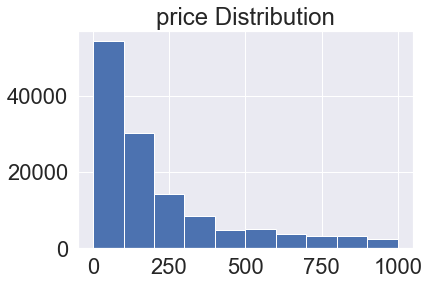

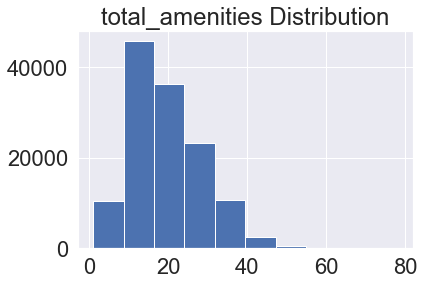

In [129]:
for col in num_vars:
    train[col].hist()
    plt.title(col+' Distribution')
    plt.show()

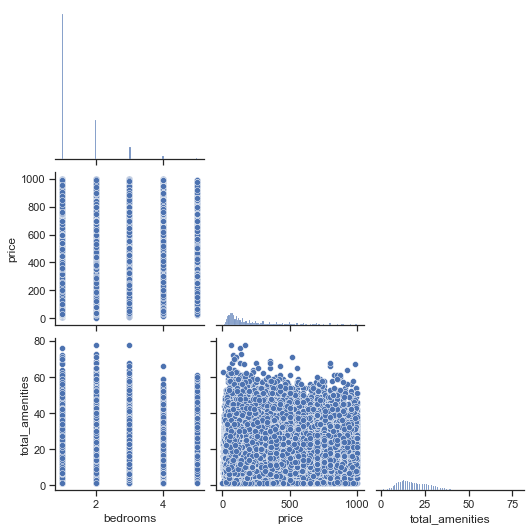

In [53]:
train_scatter = train[['bedrooms', 'price', 'total_amenities', 'city']]
sns.set_theme(style="ticks")
sns.pairplot(train_scatter, corner=True)

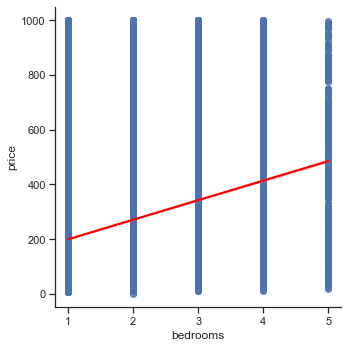

In [54]:
sns.lmplot(x="bedrooms", y="price", data=train, line_kws={'color': 'red'})
plt.show()

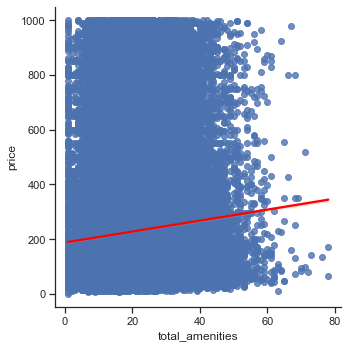

In [55]:
sns.lmplot(x="total_amenities", y="price", data=train, line_kws={'color': 'red'})
plt.show()

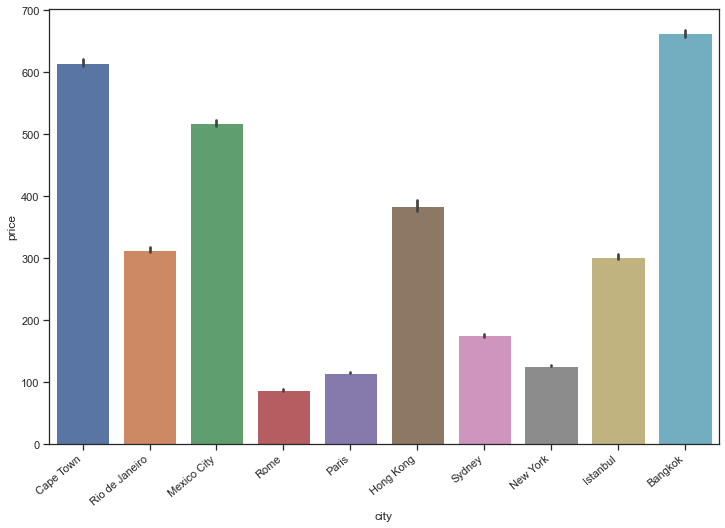

In [59]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(x='city', y='price', data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [60]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='price', y='bedrooms', data=train, hue='total_amenities')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


KeyboardInterrupt



In [131]:
cols = ['bedrooms', 'total_amenities']
X_train = train[cols]
y_train = train['price']
X_validate = validate[cols]
y_validate = validate['price']
X_test = test[cols]
y_test = test['price']

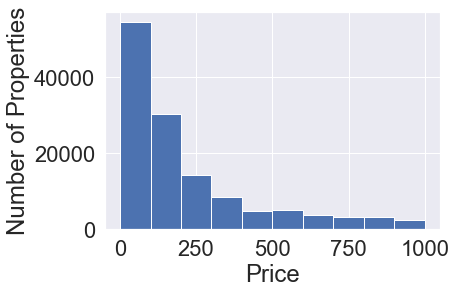

In [132]:
plt.hist(y_train)
plt.xlabel("Price")
plt.ylabel("Number of Properties")
plt.show()

In [133]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict price_value_pred_mean
price_pred_mean = y_train['price'].mean()
y_train['price_pred_mean'] = price_pred_mean
y_validate['price_pred_mean'] = price_pred_mean

# 2. compute price_value_pred_median
price_pred_median = y_train['price'].median()
y_train['price_pred_median'] = price_pred_median
y_validate['price_pred_median'] = price_pred_median

# 3. RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  225.24 
Validate/Out-of-Sample:  225.45
RMSE using Median
Train/In-Sample:  245.21 
Validate/Out-of-Sample:  245.79


In [135]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129891 entries, 31005 to 145605
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              129891 non-null  int64  
 1   price_pred_mean    129891 non-null  float64
 2   price_pred_median  129891 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 8.0 MB


In [74]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.price)

# predict train
y_train['price_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm)**(1/2)

# predict validate
y_validate['price_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  219.18002979980307 
Validation/Out-of-Sample:  219.46071238318717


In [76]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.price)

# predict train
y_train['price_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lars)**(1/2)

# predict validate
y_validate['price_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  225.24330592974712 
Validation/Out-of-Sample:  225.45103217760402


In [77]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.price)

# predict train
y_train['price_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_glm)**(1/2)

# predict validate
y_validate['price_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  219.35768045409284 
Validation/Out-of-Sample:  219.69543300499586


In [78]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [79]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.price)

# predict train
y_train['price_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm2)**(1/2)

# predict validate
y_validate['price_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  219.15884283814688 
Validation/Out-of-Sample:  219.42416050708815


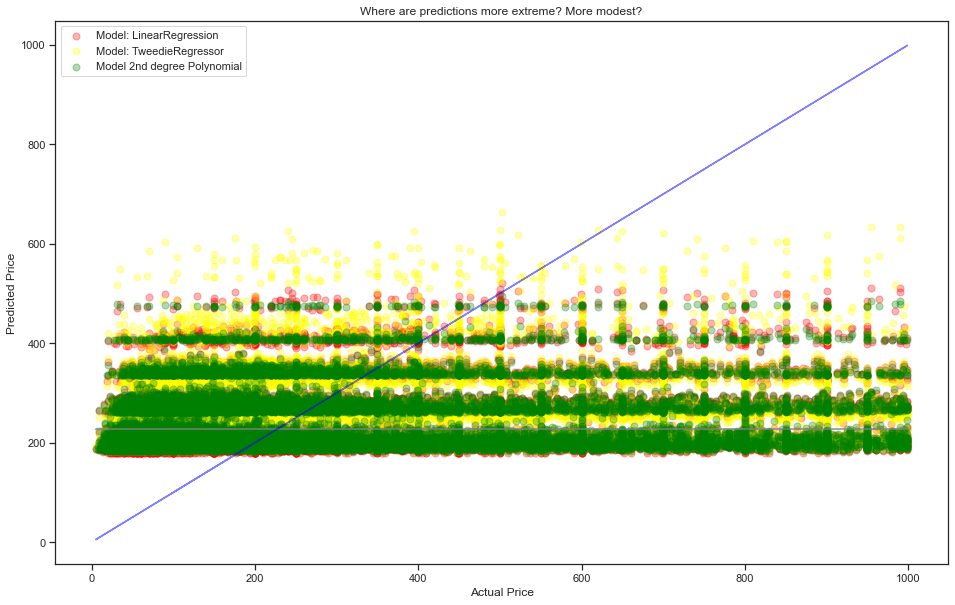

In [80]:
plt.figure(figsize=(16,10))
plt.plot(y_validate.price, y_validate.price_pred_mean, alpha=.7, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 400000.5), rotation=90)
plt.plot(y_validate.price, y_validate.price, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (19000, 1.5), rotation=31.5)

plt.scatter(y_validate.price, y_validate.price_pred_lm, 
            alpha=.3, color="red", s=50, label="Model: LinearRegression")
plt.scatter(y_validate.price, y_validate.price_pred_glm, 
            alpha=.3, color="yellow", s=50, label="Model: TweedieRegressor")
plt.scatter(y_validate.price, y_validate.price_pred_lm2, 
            alpha=.3, color="green", s=50, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Where are predictions more extreme? More modest?")

plt.show()

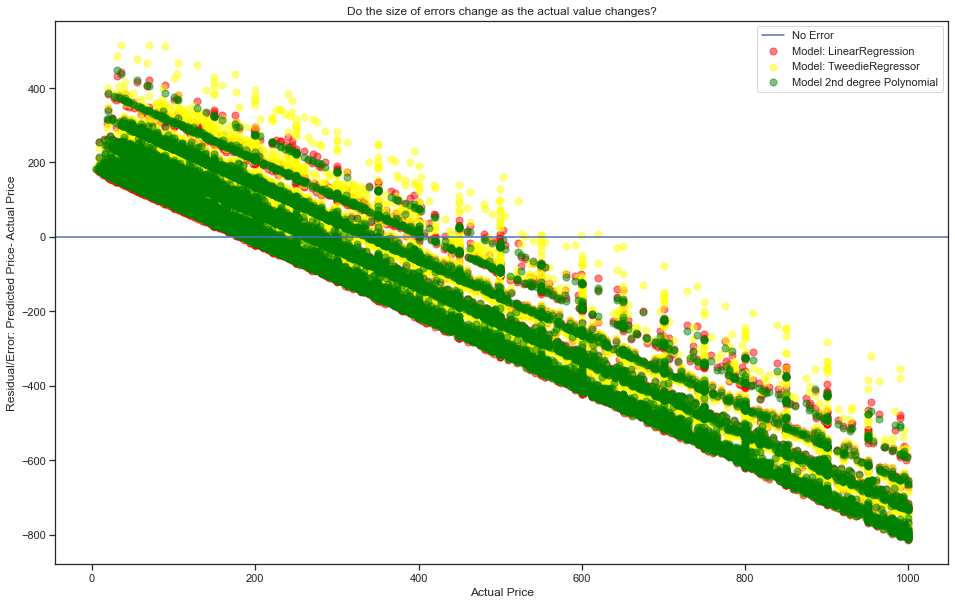

In [83]:
# y_validate.head()
plt.figure(figsize=(16,10))
plt.axhline(label="No Error")
plt.scatter(y_validate.price, y_validate.price_pred_lm-y_validate.price, 
            alpha=.5, color="red", s=50, label="Model: LinearRegression")
plt.scatter(y_validate.price, y_validate.price_pred_glm-y_validate.price, 
            alpha=.5, color="yellow", s=50, label="Model: TweedieRegressor")
plt.scatter(y_validate.price, y_validate.price_pred_lm2-y_validate.price, 
            alpha=.5, color="green", s=50, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Residual/Error: Predicted Price- Actual Price")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

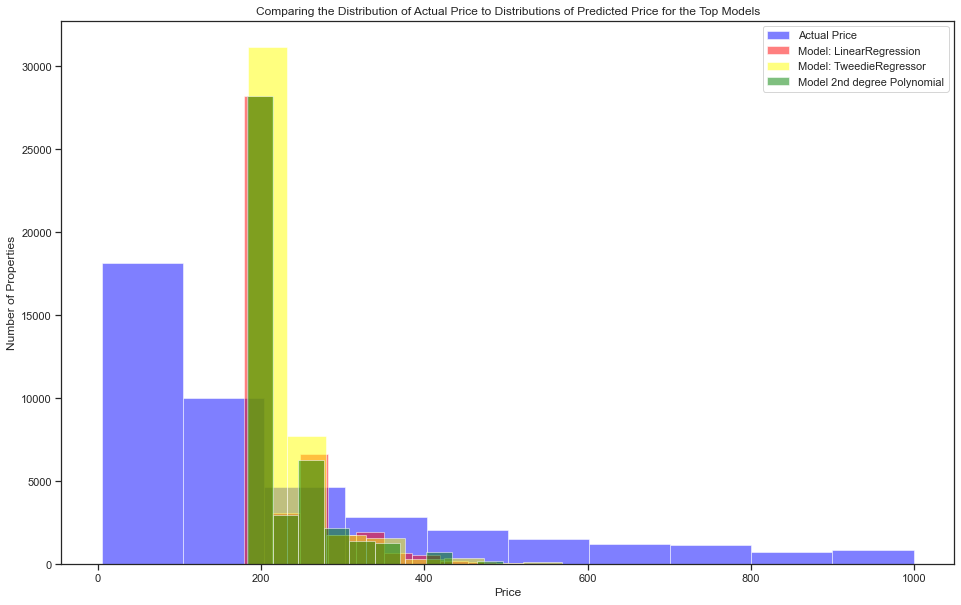

In [85]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,10))
plt.hist(y_validate.price, color='blue', alpha=.5, label="Actual Price")
plt.hist(y_validate.price_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.price_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.price_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Price")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Price to Distributions of Predicted Price for the Top Models")
plt.legend()
plt.show()

In [92]:
def test_laso():
# create the model object
    lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
    lars.fit(X_test, y_test.price)

# predict train
    y_test['price_pred_lars'] = lars.predict(X_test)

# evaluate: rmse
    rmse_test = mean_squared_error(y_test.price, y_test.price_pred_lars)**(1/2)


    print("RMSE for Lasso + Lars\nTest/In-Sample: ", rmse_test)

In [97]:
def eval_models(y_train, y_validate, X_train, X_validate, X_test):
    # create the model object
    lm = LinearRegression(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm.fit(X_train, y_train.price)

    # predict train
    y_train['price_pred_lm'] = lm.predict(X_train)

    # predict validate
    y_validate['price_pred_lm'] = lm.predict(X_validate)

    # Getting rid of the negative predicted value
    replace_lm = y_validate['price_pred_lm'].min()
    replace_lm_avg = y_validate['price_pred_lm'].mean()
    y_validate['price_pred_lm'] = y_validate['price_pred_lm'].replace(replace_lm, replace_lm_avg)

    # create the model object
    lars = LassoLars(alpha=1.0)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lars.fit(X_train, y_train.price)

    # predict train
    y_train['price_pred_lars'] = lars.predict(X_train)

    # predict validate
    y_validate['price_pred_lars'] = lars.predict(X_validate)

    # Getting rid of the negative predicted value
    replace_lars = y_validate['price_pred_lars'].min()
    replace_lars_avg = y_validate['price_pred_lars'].mean()
    y_validate['price_pred_lars'] = y_validate['price_pred_lars'].replace(replace_lars, replace_lars_avg)

    # make the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=2)

    # fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train)

    # transform X_validate_scaled & X_test_scaled
    X_validate_degree2 = pf.transform(X_validate)
    X_test_degree2 = pf.transform(X_test)

    # create the model object
    lm2 = LinearRegression(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm2.fit(X_train_degree2, y_train.price)

    # predict train
    y_train['price_pred_lm2'] = lm2.predict(X_train_degree2)

    # predict validate
    y_validate['price_pred_lm2'] = lm2.predict(X_validate_degree2)

    # Getting rid of the negative predicted value
    replace_lm2 = y_validate['price_pred_lm2'].min()
    replace_lm2_avg = y_validate['price_pred_lm2'].mode()
    y_validate['price_pred_lm2'] = y_validate['price_pred_lm2'].replace(replace_lm2, replace_lm2_avg[0])

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lars)**(1/2)
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lars)**(1/2)
    print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train, 2), 
        "\nValidation/Out-of-Sample: ", round(rmse_validate, 2))
    print("R2 Value:", round(r2_score(y_train.price, y_train.price_pred_lars), 2))
    print('-----------------------------------------------')
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm)**(1/2)
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm)**(1/2)
    print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 2), 
        "\nValidation/Out-of-Sample: ", round(rmse_validate, 2))
    print("R2 Value:", round(r2_score(y_train.price, y_train.price_pred_lm), 2))
    print('-----------------------------------------------')
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.price, y_train.price_pred_lm2)**(1/2)
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_lm2)**(1/2)
    print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", round(rmse_train, 2), 
        "\nValidation/Out-of-Sample: ", round(rmse_validate, 2))
    print("R2 Value:", round(r2_score(y_train.price, y_train.price_pred_lm2), 2))
test_laso()

RMSE for Lasso + Lars
Test/In-Sample:  225.54849053803355


In [98]:


eval_models(y_train, y_validate, X_train, X_validate, X_test)




RMSE for Lasso + Lars
Training/In-Sample:  225.24 
Validation/Out-of-Sample:  225.45
R2 Value: 0.0
-----------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  219.18 
Validation/Out-of-Sample:  219.43
R2 Value: 0.05
-----------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  219.16 
Validation/Out-of-Sample:  219.42
R2 Value: 0.05


In [107]:
def barplot_chi2(train):
    alpha = 0.05
    null_hyp = 'The City and Price are independent'
    alt_hyp = 'There is a relationship between Price and the City Airbnb is located'
    observed = pd.crosstab(train.price, train.bedrooms)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between Tax Value and the Decade Built')   
    print('P-Value', p)
    print('Chi2', round(chi2, 2))
    print('Degrees of Freedom', degf)   

In [108]:
barplot_chi2(train)

We reject the null hypothesis that The City and Price are independent
There is a relationship between Price and the City Airbnb is located
P-Value 0.0
Chi2 22344.83
Degrees of Freedom 3968


In [105]:
def baseline_RMSE(y_train, y_validate):
    # 1. Predict tax_value_pred_mean
    tax_value_pred_mean = y_train['price'].mean()
    y_train['price_pred_mean'] = price_pred_mean
    y_validate['price_pred_mean'] = price_pred_mean

    # 2. RMSE of tax_value_pred_mean
    rmse_train = mean_squared_error(y_train.price, y_train.price_pred_mean)**(1/2)
    rmse_validate = mean_squared_error(y_validate.price, y_validate.price_pred_mean)**(1/2)

    print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

In [106]:
baseline_RMSE(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  225.24 
Validate/Out-of-Sample:  225.45


In [124]:
def pearsonr_corr_explore_plot(train,num1,num2):
    ''' 
    takes in a dataframe and two series and runs a pearsonr test to determine if there's a correlation between the features
    '''
    ## putting tax value and taxes yearly into a pearsonr and then graphing it for a visual result as a result
    ## of the heat map above highlighting a good possibility of a relation


    H0 = f"That the distributions underlying the samples of {num1} and {num2} are unrelated"
    Ha = f"That the distributions underlying the samples of {num2} and {num2} are related"
    alpha = .05

    r, p = stats.pearsonr(train[num1],train[num2])

    plt.figure(figsize=(10,6))
    plt.scatter( train[num1], train[num2])
    m, b = np.polyfit(train[num1], train[num2], deg=1)
    plt.plot(train[num1], b + m * train[num1], color="k", lw=2.5,label=f"regression line - f(x)={round(m,5)}x+{round(b,0)}")
    plt.xlabel(num1)
    plt.ylabel(num2)
   

    plt.title(f'Is the correlation value indicative? (r={round(r,1)})', size=16)
    plt.legend()
    plt.show()

    print('r =', r)

    if p > alpha:
        print("\n We fail to reject the null hypothesis (",(H0) , ")",'p=%.5f' % (p))
    else:
        print("\n We reject the null Hypothesis (", '\u0336'.join(H0) + '\u0336' ,")", 'p=%.5f' % (p))

    
  
    return


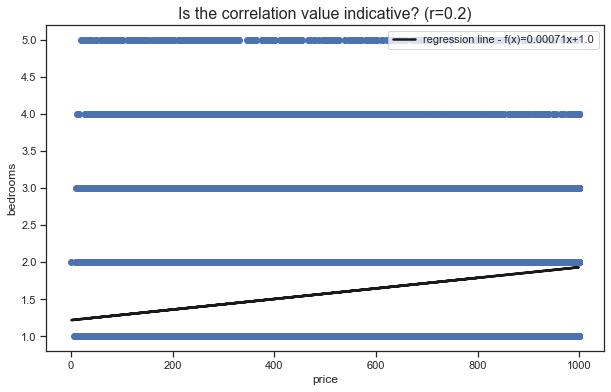

r = 0.2256244353513533

 We reject the null Hypothesis ( T̶h̶a̶t̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶s̶ ̶u̶n̶d̶e̶r̶l̶y̶i̶n̶g̶ ̶t̶h̶e̶ ̶s̶a̶m̶p̶l̶e̶s̶ ̶o̶f̶ ̶p̶r̶i̶c̶e̶ ̶a̶n̶d̶ ̶b̶e̶d̶r̶o̶o̶m̶s̶ ̶a̶r̶e̶ ̶u̶n̶r̶e̶l̶a̶t̶e̶d̶ ) p=0.00000


In [126]:
pearsonr_corr_explore_plot(train,'price','bedrooms')